In [1]:
%cd ../

/n/home11/dmorenocartagena/VisionTransformers


/n/home11/dmorenocartagena/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd

from src.data.processing.create_images import *
from src.data.processing.get_data import get_dataset
from scripts.utils import load_yaml

In [3]:
name_dataset = 'alcock_multiband'

path_data = 'data/lightcurves/alcock_multiband'
dataset_config = load_yaml('configs/datasets_config.yaml')[name_dataset]

In [4]:
partitions = pd.read_parquet(f'{path_data}/ASTROMER_partition/partitions_v1.parquet')
dataset = get_dataset(path_data, dataset_config, name_dataset)

In [5]:
dataset

,mjd,mag,err,lcid,band
0,48829.72656,-4.672,0.086,15.10555.584,1
1,48834.72266,-5.188,0.049,15.10555.584,1
2,48841.71484,-5.005,0.064,15.10555.584,1
3,48854.79688,-4.799,0.082,15.10555.584,1
4,48855.79297,-5.016,0.090,15.10555.584,1
...,...,...,...,...,...
12152,51507.69141,-4.749,0.081,15.10911.239,0
12153,51512.58203,-4.858,0.037,15.10911.239,0
12154,51513.72266,-4.907,0.047,15.10911.239,0
12155,51515.60156,-4.823,0.060,15.10911.239,0


In [6]:
dict_cols = dataset_config['dict_columns']
dict_cols

{'snid': 'lcid',
 'mjd': 'mjd',
 'flux': 'mag',
 'flux_err': 'err',
 'band': 'band',
 'label': 'label'}

In [7]:
snid_name = dict_cols['snid']
lcids = set(partitions[snid_name].values) 

if isinstance(dataset, list):
    dataset = pd.concat([df[df[snid_name].isin(lcids)] for df in dataset], ignore_index=True)
elif isinstance(dataset, pd.DataFrame):
    dataset = dataset[dataset[snid_name].isin(lcids)]

groups = [group for _, group in dataset.groupby(dict_cols['snid'])]

In [8]:
groups

[              mjd    mag    err        lcid  band
 3062  48988.68750 -8.273  0.004  11.9717.54     1
 3063  48996.71875 -8.160  0.019  11.9717.54     1
 3064  48996.73438 -8.156  0.006  11.9717.54     1
 3065  48998.66406 -8.117  0.004  11.9717.54     1
 3066  49000.66406 -8.078  0.008  11.9717.54     1
 ...           ...    ...    ...         ...   ...
 4638  51513.69922 -7.829  0.004  11.9717.54     0
 4639  51515.57031 -7.694  0.010  11.9717.54     0
 4640  51530.56250 -7.922  0.042  11.9717.54     0
 4641  51533.67188 -7.873  0.008  11.9717.54     0
 4642  51542.60547 -7.700  0.005  11.9717.54     0
 
 [1581 rows x 5 columns],
               mjd    mag    err          lcid  band
 2277  48834.71875 -4.660  0.075  14.9226.1625     1
 2278  48908.53125 -4.782  0.066  14.9226.1625     1
 2279  48917.61328 -4.508  0.051  14.9226.1625     1
 2280  48928.59375 -4.739  0.047  14.9226.1625     1
 2281  48931.54297 -4.587  0.074  14.9226.1625     1
 ...           ...    ...    ...          

In [9]:
group = groups[0]
group

,mjd,mag,err,lcid,band
3062,48988.68750,-8.273,0.004,11.9717.54,1
3063,48996.71875,-8.160,0.019,11.9717.54,1
3064,48996.73438,-8.156,0.006,11.9717.54,1
3065,48998.66406,-8.117,0.004,11.9717.54,1
3066,49000.66406,-8.078,0.008,11.9717.54,1
...,...,...,...,...,...
4638,51513.69922,-7.829,0.004,11.9717.54,0
4639,51515.57031,-7.694,0.010,11.9717.54,0
4640,51530.56250,-7.922,0.042,11.9717.54,0
4641,51533.67188,-7.873,0.008,11.9717.54,0


In [10]:
for col in [dict_cols['flux'], dict_cols['flux_err'], dict_cols['mjd']]:
    group[col] = (group[col] - group[col].min()) / (group[col].max() - group[col].min())

In [11]:
group

,mjd,mag,err,lcid,band
3062,0.060679,0.078366,0.012048,11.9717.54,1
3063,0.063633,0.203091,0.192771,11.9717.54,1
3064,0.063639,0.207506,0.036145,11.9717.54,1
3065,0.064348,0.250552,0.012048,11.9717.54,1
3066,0.065084,0.293598,0.060241,11.9717.54,1
...,...,...,...,...,...
4638,0.989368,0.568433,0.012048,11.9717.54,0
4639,0.990057,0.717439,0.084337,11.9717.54,0
4640,0.995571,0.465784,0.469880,11.9717.54,0
4641,0.996714,0.519868,0.060241,11.9717.54,0


In [12]:
oid = group[dict_cols['snid']].iloc[0]
oid

'11.9717.54'

In [13]:
group[group[dict_cols['band']] == 1]

,mjd,mag,err,lcid,band
3062,0.060679,0.078366,0.012048,11.9717.54,1
3063,0.063633,0.203091,0.192771,11.9717.54,1
3064,0.063639,0.207506,0.036145,11.9717.54,1
3065,0.064348,0.250552,0.012048,11.9717.54,1
3066,0.065084,0.293598,0.060241,11.9717.54,1
...,...,...,...,...,...
3556,0.917561,0.153422,0.072289,11.9717.54,1
3557,0.921583,0.136865,0.048193,11.9717.54,1
3558,0.925984,0.146799,0.349398,11.9717.54,1
3559,0.930034,0.147903,0.012048,11.9717.54,1


In [14]:
config = load_yaml('configs/online/run_config.yaml')['ft_classification']
config

{'results_dir': 'results',
 'exp_description': '',
 'model_name': 'swinv2',
 'checkpoint': {'use': False,
  'exp_name': 'ft_classification/elasticc_1/testing',
  'run_name': '2024-08-31_01-39-33',
  'results_dir': 'results'},
 'pretrained_model': {'use': True,
  'path': 'microsoft/swinv2-tiny-patch4-window16-256'},
 'list_folds': [0],
 'debug': False,
 'loader': {'path_data': 'data/lightcurves/elasticc_1',
  'spc': None,
  'num_workers': 15,
  'use_png': False},
 'training': {'lr': 5e-05,
  'patience': 10,
  'num_epochs': 10000,
  'batch_size': 64,
  'use_weighted_sampling': False,
  'monitor': 'f1/val',
  'cache_enabled': False,
  'classifier': {'use': True, 'only_train_classifier': False},
  'use_metadata': False},
 'imgs_params': {'norm_name': 'minmax_by_obj',
  'input_type': 'overlay',
  'use_err': False,
  'fig_params': {'figsize': [2.56, 2.56],
   'fmt': '-o',
   'markersize': 2.0,
   'linewidth': 1.0,
   'colors': {0: '#00FF7F',
    1: '#7FFF00',
    2: '#FF007F',
    3: '#FF7F0

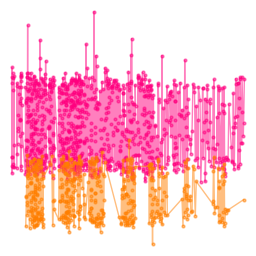

In [15]:
image = create_overlay_images(group, config, dataset_config, name_dataset)
image

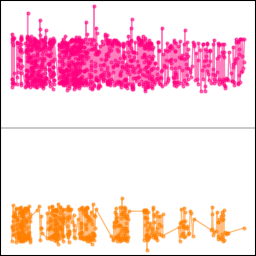

In [16]:
image = create_2grid_images(group, config, dataset_config)
image